In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('kmeans.csv')

In [3]:
data_normalized = (data - data.mean()) / data.std()

In [4]:
def initialize_centroids(k, data):
    centroids = data.sample(k)
    return centroids.values

In [5]:
def assign_clusters(data, centroids):
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

In [6]:
def update_centroids(data, clusters, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_data = data[clusters == i]
        centroids[i] = cluster_data.mean(axis=0)
    return centroids

In [7]:
def compute_distortion(data, centroids, clusters):
    distortion = 0
    for i, centroid in enumerate(centroids):
        cluster_data = data[clusters == i]
        distortion += ((cluster_data - centroid)**2).sum()
    return distortion

In [8]:
def kmeans(data, k, max_iter=100):
    centroids = initialize_centroids(k, data)
    for _ in range(max_iter):
        clusters = assign_clusters(data.values, centroids)
        new_centroids = update_centroids(data.values, clusters, k)
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    return clusters, centroids

In [9]:
clusters_k2, centroids_k2 = kmeans(data_normalized, k=2)
clusters_k3, centroids_k3 = kmeans(data_normalized, k=3)


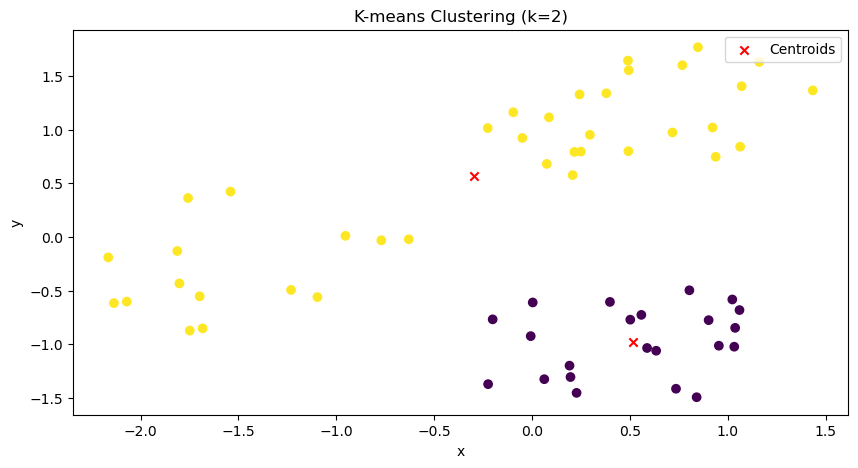

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(data_normalized['x'], data_normalized['y'], c=clusters_k2)
plt.scatter(centroids_k2[:, 0], centroids_k2[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering (k=2)')
plt.legend()
plt.show()


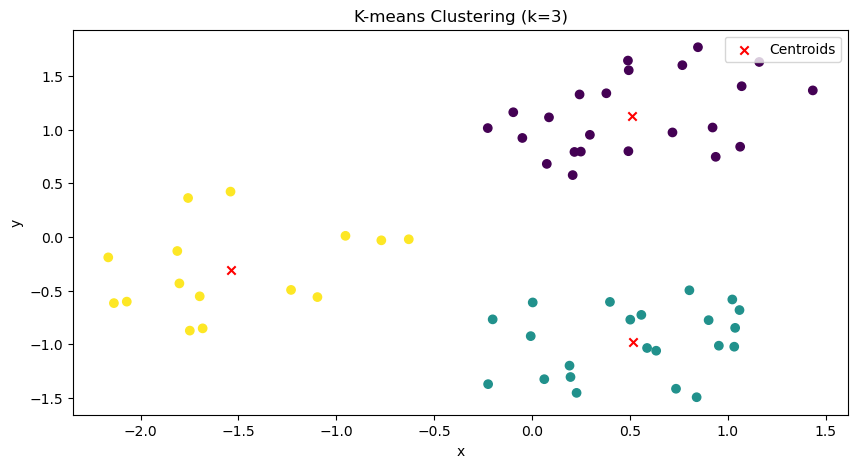

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(data_normalized['x'], data_normalized['y'], c=clusters_k3)
plt.scatter(centroids_k3[:, 0], centroids_k3[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering (k=3)')
plt.legend()
plt.show()